# Importing Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('float_format', '{:f}'.format)

In [2]:
df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\outlier_clean.csv")

In [3]:
df.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday


In [4]:
# droping unwanted columns
df.drop(columns= "Unnamed: 0", inplace = True)

# Types of Features

**1. Numerical Feature**

In [5]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 11
['store_nbr', 'sales', 'onpromotion', 'transferred', 'oil_price', 'cluster', 'transactions', 'year', 'month', 'week', 'quarter']


**2. Categorical Features**

In [6]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 10
['date', 'family', 'holiday_type', 'locale', 'locale_name', 'description', 'city', 'state', 'store_type', 'day_of_week']


**3. Discerte Features**

In [7]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))
print(discrete_feature)

Num of Discrete Features : 5
['transferred', 'cluster', 'year', 'month', 'quarter']


**4. Year Features**

In [8]:
year_features=[feature for feature in df.columns if 'date' in feature or 'month' in feature or 'year' in feature or  'day' in feature or 'week' in feature]
print('Num of Year Features :',len(year_features))
print(year_features)

Num of Year Features : 6
['date', 'holiday_type', 'year', 'month', 'week', 'day_of_week']


**5. Continuous features**

In [9]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_features]
print('Num of Continuous Features :',len(continuous_feature))
print(continuous_feature)

Num of Continuous Features : 5
['store_nbr', 'sales', 'onpromotion', 'oil_price', 'transactions']


# Hypothesis Testing

# 1. Checking Corelation

In [10]:
df.corr()

,store_nbr,sales,onpromotion,transferred,oil_price,cluster,transactions,year,month,week,quarter
store_nbr,1.000000,0.041273,0.007744,0.000000,-0.000203,-0.059284,0.182013,0.000000,-0.000000,-0.000000,-0.000000
sales,0.041273,1.000000,0.428241,-0.003114,-0.075462,0.038537,0.213506,0.081320,0.020250,0.016804,0.018752
onpromotion,0.007744,0.428241,1.000000,0.013968,-0.154516,0.005702,0.025754,0.198913,0.025600,0.022347,0.024860
transferred,0.000000,-0.003114,0.013968,1.000000,-0.026728,0.000000,-0.012179,0.056500,0.004771,0.031317,0.016777
oil_price,-0.000203,-0.075462,-0.154516,-0.026728,1.000000,0.000029,0.022785,-0.833957,0.009544,0.006487,0.010356
cluster,-0.059284,0.038537,0.005702,0.000000,0.000029,1.000000,0.190945,0.000000,0.000000,0.000000,0.000000
transactions,0.182013,0.213506,0.025754,-0.012179,0.022785,0.190945,1.000000,-0.034876,0.039805,0.029971,0.031546
year,0.000000,0.081320,0.198913,0.056500,-0.833957,0.000000,-0.034876,1.000000,-0.143380,-0.136850,-0.137833
month,-0.000000,0.020250,0.025600,0.004771,0.009544,0.000000,0.039805,-0.143380,1.000000,0.966018,0.970032
week,-0.000000,0.016804,0.022347,0.031317,0.006487,0.000000,0.029971,-0.136850,0.966018,1.000000,0.940961


<AxesSubplot:>

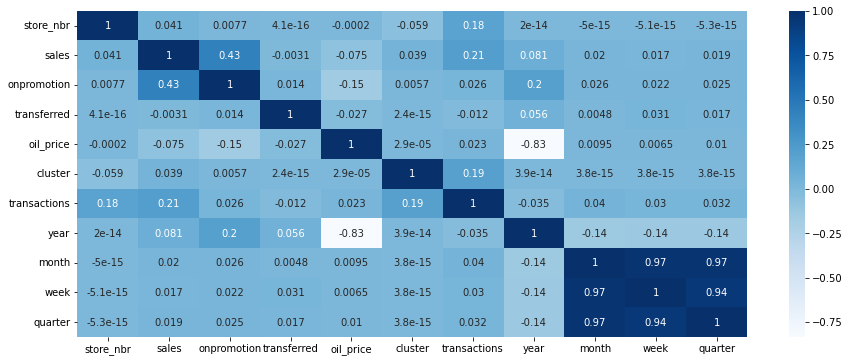

In [11]:
plt.figure(figsize =(15,6))
sns.heatmap(df.corr(), annot= True, cmap ="Blues")

In [12]:
# checking correlation of features with sales
df.corr()['sales']

store_nbr       0.041273
sales           1.000000
onpromotion     0.428241
transferred    -0.003114
oil_price      -0.075462
cluster         0.038537
transactions    0.213506
year            0.081320
month           0.020250
week            0.016804
quarter         0.018752
Name: sales, dtype: float64

<AxesSubplot:>

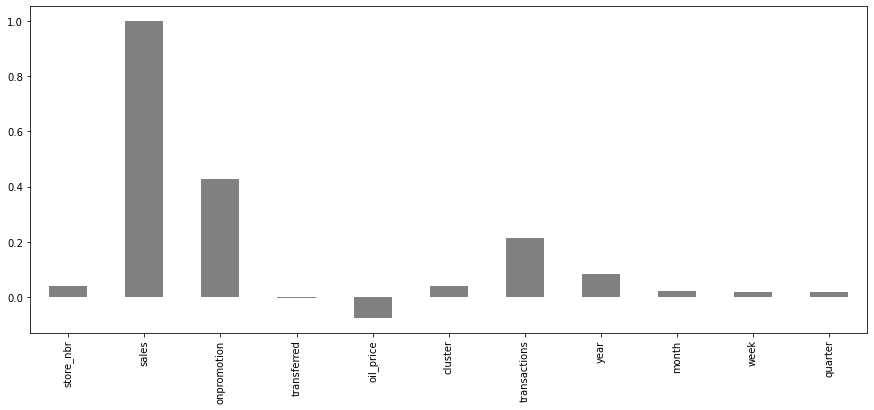

In [13]:
# checking correlation of features with sales
plt.figure(figsize =(15,6))
df.corr()['sales'].plot(kind ='bar', color ='grey')

**Observation**
1. OnPromotion has highest correlation with sales which is 43%
2. Oil_price has highest negative correlation with 8%
3. Transcations has second highest correlation with sales

In [14]:
num_df = df[num_features]

####   Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [15]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Shapiro Hypothesis Result
0,store_nbr,Not Normally Distributed
1,sales,Not Normally Distributed
2,onpromotion,Not Normally Distributed
3,transferred,Not Normally Distributed
4,oil_price,Normally Distributed
5,cluster,Not Normally Distributed
6,transactions,Not Normally Distributed
7,year,Not Normally Distributed
8,month,Not Normally Distributed
9,week,Not Normally Distributed


**observation**
1. Only oil price is normarly distributed 
2. other all columns are not normaly distributed

####  Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

In [16]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [17]:
columns_combination = []
test_results = []
#test_correlation(spearmanr,'math score','reading score')
for i in num_features:
    for j in num_features:
            test_correlation(spearmanr,i,j)
        

In [18]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr.head()

,col1,col2
Dependent Samples,store_nbr,store_nbr
Dependent Samples,store_nbr,sales
Dependent Samples,store_nbr,onpromotion
Independent Samples,store_nbr,transferred
Dependent Samples,store_nbr,oil_price


####  Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [19]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in cat_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['sales'], df[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[cat_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,date,Dependent Categories
1,family,Dependent Categories
2,holiday_type,Dependent Categories
3,locale,Independent Categories
4,locale_name,Independent Categories
5,description,Independent Categories
6,city,Independent Categories
7,state,Independent Categories
8,store_type,Dependent Categories
9,day_of_week,Dependent Categories


# Anova Test

In [25]:
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test for each column
results = []
for column in num_features:
    if column != 'sales':
        f_statistic, p_value = f_oneway(df[column], df['sales'])
        results.append((column, f_statistic, p_value))

# Create a DataFrame of results
results_df = pd.DataFrame(results, columns=['Column', 'F-Statistic', 'P-value'])

# Sort the DataFrame by p-value in ascending order
results_df = results_df.sort_values(by='P-value')

# Print the DataFrame of results
results_df


,Column,F-Statistic,P-value
0,store_nbr,273737.785402,0.000000
1,onpromotion,316394.914017,0.000000
2,transferred,321089.214951,0.000000
4,cluster,306101.196096,0.000000
5,transactions,2623250.826855,0.000000
6,year,6830074.112416,0.000000
7,month,310061.061606,0.000000
8,week,277374.310580,0.000000
9,quarter,316795.400171,0.000000
3,oil_price,NaN,NaN


**Observation**
* If the p-value is zero in an ANOVA test, it indicates that there is strong evidence to reject the null hypothesis. In the context of ANOVA, the null hypothesis assumes that there are no significant differences between the means of the groups being compared.

* A p-value of zero suggests that the observed differences between the groups are highly unlikely to be due to chance. Therefore, it implies that there are indeed statistically significant differences between the groups' means.

* When conducting an ANOVA test, the decision to reject or fail to reject the null hypothesis is based on a significance level (alpha) that is predetermined. Typically, if the p-value is less than the chosen significance level (e.g., 0.05), the null hypothesis is rejected in favor of the alternative hypothesis, which states that there are significant differences among the groups.

* It's important to note that a p-value of zero is not an absolute certainty of the differences but rather indicates extremely strong evidence against the null hypothesis. It suggests that the observed differences are highly likely to be meaningful and not due to random chance.